<a href="https://colab.research.google.com/github/Praneesha-Daggupati/Praneesha-Daggupati/blob/main/Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Bangli-P10_gabor.csv")

# Assuming the "Original Image" column is the class label, and columns Gabor1 to Gabor32 are features
class_label_column = "Original Image"
feature_columns = df.columns[2:]

# Extract features and class labels
X = df[feature_columns].values
y = df[class_label_column].values

# Function to calculate mean and standard deviation for each class
def calculate_class_stats(X, y, class_label):
    class_indices = np.where(y == class_label)
    class_data = X[class_indices]

    class_mean = np.mean(class_data, axis=0)
    class_std = np.std(class_data, axis=0)

    return class_mean, class_std

# Function to calculate Euclidean distance between class centroids
def calculate_distance(centroid1, centroid2):
    return np.linalg.norm(centroid1 - centroid2)

# Get unique class labels
unique_labels = np.unique(y)

# Choose two classes for evaluation
class_label1 = unique_labels[0]  # Use the actual numerical label for the "Original Image" column
class_label2 = unique_labels[1]  # Use the actual numerical label for the other class

# Calculate mean and standard deviation for each class
centroid1, std1 = calculate_class_stats(X, y, class_label1)
centroid2, std2 = calculate_class_stats(X, y, class_label2)

# Calculate Euclidean distance between class centroids
distance_between_classes = calculate_distance(centroid1, centroid2)

# Print the results
print(f"Mean vector for class {class_label1}: {centroid1}")
print(f"Standard deviation vector for class {class_label1}: {std1}")
print()
print(f"Mean vector for class {class_label2}: {centroid2}")
print(f"Standard deviation vector for class {class_label2}: {std2}")
print()
print(f"Distance between class centroids: {distance_between_classes}")


Mean vector for class 27: [  0.   0. 255. 138.  93.  45.  37.  18.   0.   0. 197. 177.   0.   0.
   0.   0.   0.   0. 255. 255.  44.   0. 124.  12.   0.   0. 255. 255.
  36.  19.  43.  21.]
Standard deviation vector for class 27: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]

Mean vector for class 31: [  0.   0. 226. 111.  73.  36.  30.  15.   0.   0. 155. 140.   0.   0.
   0.   0.   0.   0. 255. 255.  36.   0.  98.  12.   0.   0. 255. 255.
  29.  15.  44.  25.]
Standard deviation vector for class 31: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]

Distance between class centroids: 77.87168933572714


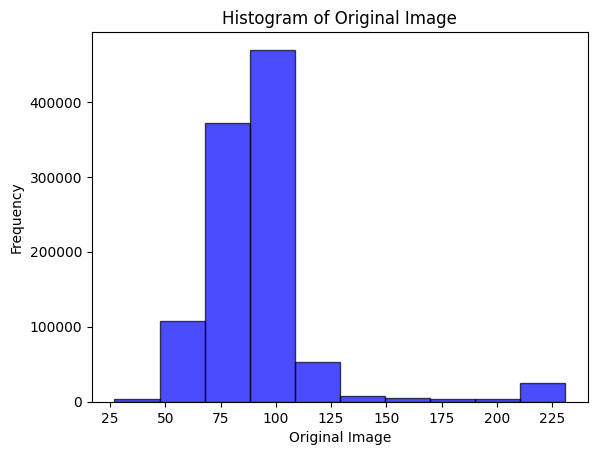

Mean of Original Image: 92.04493431561882
Variance of Original Image: 722.9971016187213


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Bangli-P10_gabor.csv")

# Choose the feature for analysis (replace 'Original Image' with the actual column name)
feature_name = 'Original Image'
feature_data = df[feature_name].values

# Plot the histogram
plt.hist(feature_data, bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title(f'Histogram of {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('Frequency')
plt.show()

# Calculate mean and variance
mean_value = np.mean(feature_data)
variance_value = np.var(feature_data)

print(f"Mean of {feature_name}: {mean_value}")
print(f"Variance of {feature_name}: {variance_value}")


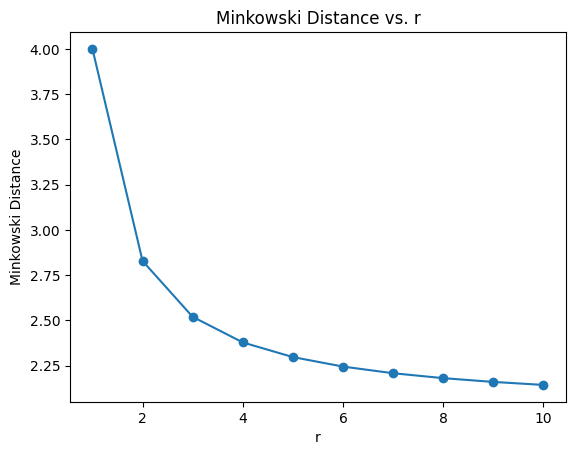

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Bangli-P10_gabor.csv")

# Choose any two feature vectors (replace 0 and 1 with the indices of the vectors you want to compare)
vector1 = df.iloc[0, 2:].values
vector2 = df.iloc[1, 2:].values

# Calculate Minkowski distances for varying values of r from 1 to 10
r_values = np.arange(1, 11)
distances = [minkowski(vector1, vector2, p=r) for r in r_values]

# Plot the distances
plt.plot(r_values, distances, marker='o', linestyle='-')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.show()


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Bangli-P10_gabor.csv")

# Extract features and class labels
X = df.iloc[:, 2:].values  # Assuming columns 3 to 33 are features
y = df.iloc[:, 1].values    # Assuming column 2 is the class label

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (734002, 32)
X_test shape: (314573, 32)
y_train shape: (734002,)
y_test shape: (314573,)


In [14]:
 import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = "/content/drive/MyDrive/Bangli-P10_gabor.csv"  # Replace with the actual path to your dataset
df = pd.read_csv(data_path)

# Extract features and class labels
X = df.iloc[:, 1:].values  # Assuming columns 2 to 32 are features
y = df.iloc[:, 0].values    # Assuming column 1 is the class label

# Choose the class labels for classification
class_label1 = 227
class_label2 = 226

# Select rows corresponding to the chosen classes
class_data = df[(df['Original Image'] == class_label1) | (df['Original Image'] == class_label2)]

# Check if both class labels are present
if len(class_data[class_data['Original Image'] == class_label1]) > 0 and len(class_data[class_data['Original Image'] == class_label2]) > 0:
    # Features and class labels for the chosen classes
    X_selected = class_data.iloc[:, 1:].values
    y_selected = class_data.iloc[:, 0].values

    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.3, random_state=42)

    # Create a kNN classifier with k=3
    knn_classifier = KNeighborsClassifier(n_neighbors=3)

    # Train the classifier on the training set
    knn_classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_classifier.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of kNN classifier with k=3: {accuracy}")

else:
    print("One or both of the specified class labels are not present in the selected subset.")


Accuracy of kNN classifier with k=3: 0.0


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your dataset (replace 'YourDatasetPath' with the actual path)
df = pd.read_csv("/content/drive/MyDrive/Bangli-P10_gabor.csv")

# Assuming class labels are in the second column
class_label1 = 'bad'
class_label2 = 'medium'

# Select rows corresponding to the chosen classes
class_data = df[(df.iloc[:, 1] == class_label1) | (df.iloc[:, 1] == class_label2)]

# Features and class labels for the chosen classes
X_selected = class_data.iloc[:, 2:-1].values
y_selected = class_data.iloc[:, 1].values

# Print the size of the selected dataset
print(f"Size of the selected dataset: {X_selected.shape[0]} samples")

# Check if there are enough samples for splitting
if X_selected.shape[0] > 0:
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.3, random_state=42)

    # Vary k from 1 to 11
    k_values = np.arange(1, 12)
    accuracy_nn = []  # to store accuracy for NN classifier
    accuracy_knn3 = []  # to store accuracy for kNN classifier with k=3

    for k in k_values:
        # NN classifier
        nn_classifier = KNeighborsClassifier(n_neighbors=k)
        nn_classifier.fit(X_train, y_train)
        y_pred_nn = nn_classifier.predict(X_test)
        accuracy_nn.append(accuracy_score(y_test, y_pred_nn))

        # kNN classifier with k=3
        knn_classifier = KNeighborsClassifier(n_neighbors=3)
        knn_classifier.fit(X_train, y_train)
        y_pred_knn3 = knn_classifier.predict(X_test)
        accuracy_knn3.append(accuracy_score(y_test, y_pred_knn3))

    # Plot the results
    plt.plot(k_values, accuracy_nn, label='NN (k varying)')
    plt.plot(k_values, accuracy_knn3, label='kNN (k=3)')
    plt.title('Accuracy Comparison for NN and kNN (k=3)')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
else:
    print("Insufficient samples for splitting. Please check your dataset.")


Size of the selected dataset: 0 samples
Insufficient samples for splitting. Please check your dataset.


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Bangli-P10_gabor.csv")

# Explore unique values in 'Original Image' column
unique_values = df['Original Image'].unique()
print("Unique values in 'Original Image' column:", unique_values)

# Choose any two unique values for binary classification
class_label1 = unique_values[0]
class_label2 = unique_values[1]

# Select rows corresponding to the chosen classes
class_data = df[(df['Original Image'] == class_label1) | (df['Original Image'] == class_label2)]

# Features and class labels for the chosen classes
X_selected = class_data.iloc[:, 1:-1].values
y_selected = class_data.iloc[:, -1].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.3, random_state=42)

# Create a kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Predictions on training set
y_train_pred = knn_classifier.predict(X_train)

# Predictions on test set
y_test_pred = knn_classifier.predict(X_test)

# Confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Set):")
print(conf_matrix_train)

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):")
print(conf_matrix_test)

# Precision, Recall, and F1-Score for training set
precision_train = precision_score(y_train, y_train_pred, average='weighted')  # Use 'weighted' for multi-class
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_score_train = f1_score(y_train, y_train_pred, average='weighted')

# Precision, Recall, and F1-Score for test set
precision_test = precision_score(y_test, y_test_pred, average='weighted')  # Use 'weighted' for multi-class
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_score_test = f1_score(y_test, y_test_pred, average='weighted')

# Print performance metrics
print("\nPerformance Metrics (Training Set):")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1-Score: {f1_score_train}")

print("\nPerformance Metrics (Test Set):")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-Score: {f1_score_test}")


Unique values in 'Original Image' column: [228 227 226 229 230 225 224 223 222 221 220 219 218 217 216 215 214 213
 211 210 209 212 208 206 205 207 201 200 202 203 199 196 191 189 188 194
 192 197 190 195 193 198 186 187 182 178 175 176 177 179 181 180 170 172
 171 168 166 169 163 164 156 159 161 174 167 173 157 151 152 155 153 154
 150 149 160 158 162 144 147 148 146 145 143 142 140 165 137 139 141 133
 125 119 123 127 128 130 131 124 129 126 120 116 113 108 104 106 134 136
 184 185 183 138 132 204 135 121 115 112 118 122 110 107 109 102  99 101
 111 105 117  87  76  98 114 103 100  83  66  84  97  95  96  92  88  86
  93  89  91  94  90  79  78  74  69  67  72  77  70  73  65  58  85  82
  57  80  75  81  60  71  61  53  49  54  62  59  52  50  46  43  48  55
  64  68  63  44  56  51  45  40  47  41  37  38  36  42  34  39  32 231
  35  33  31  27]
Confusion Matrix (Training Set):
[[   2    0    0    0    0    0    0]
 [   0    2    3    0    0    0    0]
 [   0    0  121   29    0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
